In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
df_train = pd.read_excel("fraudTrain.xlsx")
df_test = pd.read_excel("fraudTest.xlsx")

In [59]:
print(df_train.shape[0])
print(df_test.shape[0])

125096
113533


In [61]:
df = pd.concat([df_train, df_test])
df.shape[0]

238629

In [63]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652090,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


<Axes: xlabel='is_fraud'>

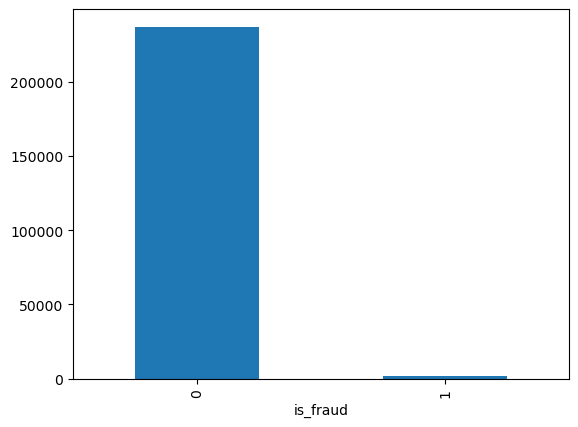

In [65]:
df.groupby("is_fraud").count()["cc_num"].plot(kind = "bar")

In [67]:
fraud = df[df["is_fraud"] == 1]
not_fraud =  df[df["is_fraud"] == 0]
print(fraud.shape[0])
print(not_fraud.shape[0])

1601
237028


In [69]:
not_fraud = not_fraud.sample(fraud.shape[0], random_state = 42)
df_new = pd.concat([fraud, not_fraud])

<Axes: xlabel='is_fraud'>

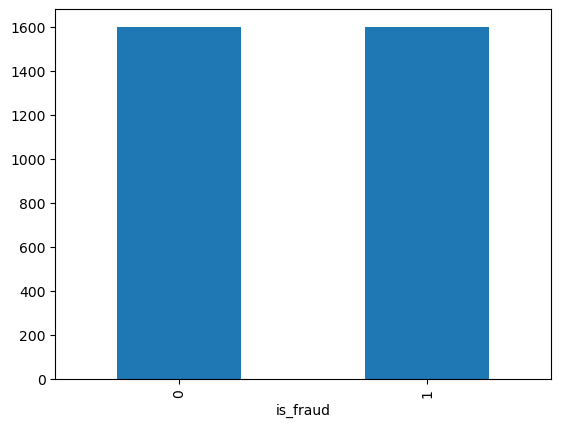

In [71]:
df_new.groupby("is_fraud").count()['cc_num'].plot(kind = "bar")

In [75]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3202 entries, 2449 to 74907
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3202 non-null   int64         
 1   trans_date_trans_time  3202 non-null   datetime64[ns]
 2   cc_num                 3202 non-null   int64         
 3   merchant               3202 non-null   object        
 4   category               3202 non-null   object        
 5   amt                    3202 non-null   float64       
 6   first                  3202 non-null   object        
 7   last                   3202 non-null   object        
 8   gender                 3202 non-null   object        
 9   street                 3202 non-null   object        
 10  city                   3202 non-null   object        
 11  state                  3202 non-null   object        
 12  zip                    3202 non-null   int64         
 13  lat 

In [77]:
cols = [
    'Unnamed: 0',
    'merchant',
    'cc_num',
    'first',
    'zip',
    'last',
    'trans_num',
    'unix_time',
    'street',
    'merch_lat',
    'gender',
    'merch_long',
    'job',
    'trans_date_trans_time'
]

# Dropping the columns
df_new.drop(columns=cols, inplace=True)

In [79]:
df_new.duplicated().sum()

1

In [81]:
df_new.drop_duplicates()

,category,amt,city,state,lat,long,city_pop,dob,is_fraud
2449,grocery_pos,281.06,Collettsville,NC,35.9946,-81.7266,885,1988-09-15,1
2472,gas_transport,11.52,San Antonio,TX,29.4400,-98.4590,1595797,1960-10-28,1
2523,grocery_pos,276.31,San Antonio,TX,29.4400,-98.4590,1595797,1960-10-28,1
2546,gas_transport,7.03,Collettsville,NC,35.9946,-81.7266,885,1988-09-15,1
2553,grocery_pos,275.73,San Antonio,TX,29.4400,-98.4590,1595797,1960-10-28,1
...,...,...,...,...,...,...,...,...,...
109090,entertainment,55.11,Oolitic,IN,38.8938,-86.5246,1228,1991-03-13,0
19931,grocery_pos,70.95,Mountain Center,CA,33.6401,-116.5567,1661,1988-09-19,0
6344,grocery_net,50.89,Cowlesville,NY,42.8112,-78.4481,1166,1983-06-12,0
88640,personal_care,66.06,Holloway,OH,40.0113,-80.9701,128,1946-04-03,0


In [83]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3202 entries, 2449 to 74907
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   category  3202 non-null   object        
 1   amt       3202 non-null   float64       
 2   city      3202 non-null   object        
 3   state     3202 non-null   object        
 4   lat       3202 non-null   float64       
 5   long      3202 non-null   float64       
 6   city_pop  3202 non-null   int64         
 7   dob       3202 non-null   datetime64[ns]
 8   is_fraud  3202 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 250.2+ KB


In [85]:
df_new["dob"] = pd.to_datetime(df_new["dob"])

In [87]:
from datetime import datetime
df_new["dob"] = df_new["dob"].dt.year
df_new['dob'] = datetime.now().year - df_new['dob']
df_new = df_new.rename(columns = {"dob" : "age"})
df_new

,category,amt,city,state,lat,long,city_pop,age,is_fraud
2449,grocery_pos,281.06,Collettsville,NC,35.9946,-81.7266,885,36,1
2472,gas_transport,11.52,San Antonio,TX,29.4400,-98.4590,1595797,64,1
2523,grocery_pos,276.31,San Antonio,TX,29.4400,-98.4590,1595797,64,1
2546,gas_transport,7.03,Collettsville,NC,35.9946,-81.7266,885,36,1
2553,grocery_pos,275.73,San Antonio,TX,29.4400,-98.4590,1595797,64,1
...,...,...,...,...,...,...,...,...,...
109090,entertainment,55.11,Oolitic,IN,38.8938,-86.5246,1228,33,0
19931,grocery_pos,70.95,Mountain Center,CA,33.6401,-116.5567,1661,36,0
6344,grocery_net,50.89,Cowlesville,NY,42.8112,-78.4481,1166,41,0
88640,personal_care,66.06,Holloway,OH,40.0113,-80.9701,128,78,0


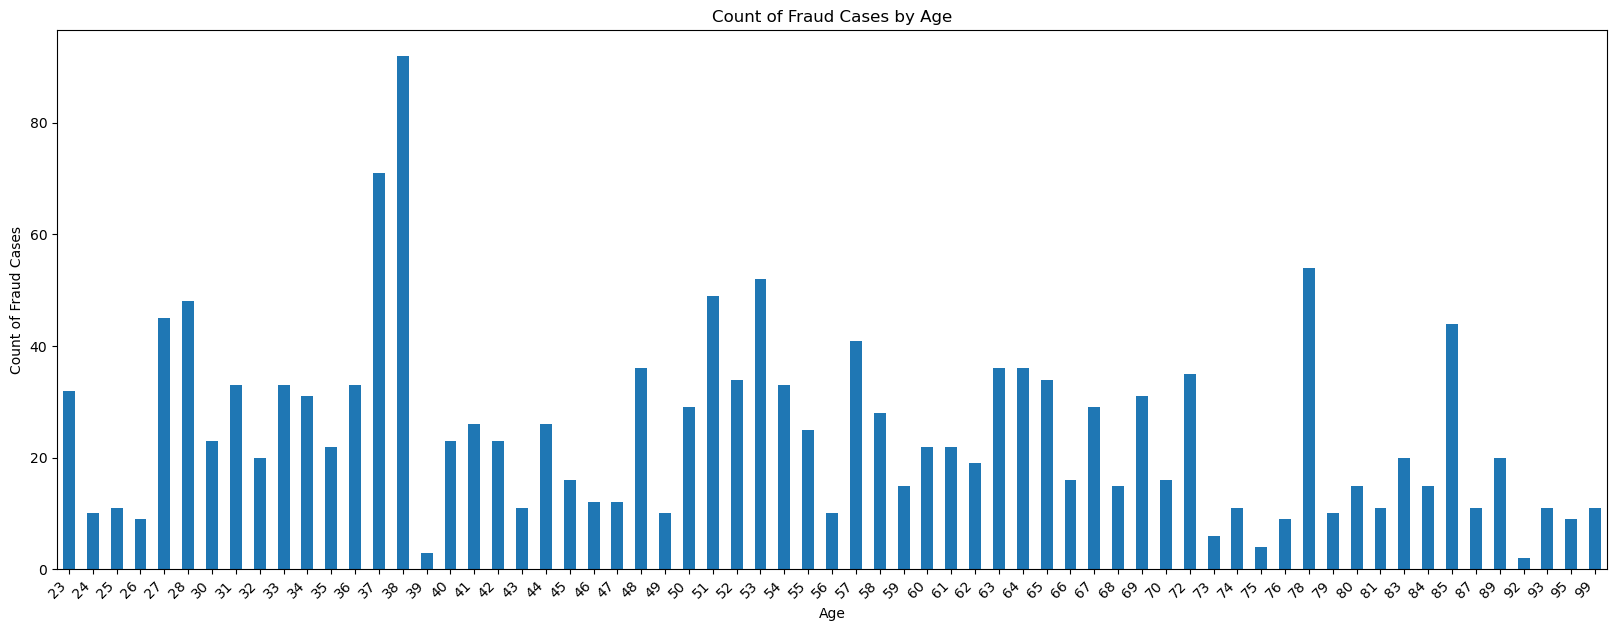

In [89]:
plt.figure(figsize=(20, 7))
ax = df_new[df_new['is_fraud'] == 1].groupby('age').count()['is_fraud'].plot(kind='bar')
ax.set_xlabel('Age')
ax.set_ylabel('Count of Fraud Cases')
ax.set_title('Count of Fraud Cases by Age')
plt.xticks(rotation=45, ha='right')
plt.show()

In [91]:
numeric_columns = [i for i in df_new.columns if df_new[i].dtype == 'int64' or df_new[i].dtype =='int32' or df_new[i].dtype =='float64']
categorical_columns = [i for i in df_new.columns if df_new[i].dtype == 'object']

In [93]:
print(numeric_columns)
print(categorical_columns)

['amt', 'lat', 'long', 'city_pop', 'age', 'is_fraud']
['category', 'city', 'state']


In [95]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
encoder = LabelEncoder()
for col in categorical_columns:
    df_new[col] = encoder.fit_transform(df_new[col])
df_new

,category,amt,city,state,lat,long,city_pop,age,is_fraud
2449,4,281.06,130,26,35.9946,-81.7266,885,36,1
2472,2,11.52,541,42,29.4400,-98.4590,1595797,64,1
2523,4,276.31,541,42,29.4400,-98.4590,1595797,64,1
2546,2,7.03,130,26,35.9946,-81.7266,885,36,1
2553,4,275.73,541,42,29.4400,-98.4590,1595797,64,1
...,...,...,...,...,...,...,...,...,...
109090,0,55.11,458,14,38.8938,-86.5246,1228,33,0
19931,4,70.95,411,4,33.6401,-116.5567,1661,36,0
6344,3,50.89,140,33,42.8112,-78.4481,1166,41,0
88640,10,66.06,278,34,40.0113,-80.9701,128,78,0


In [ ]:
columns = df_new.columns.tolist() 
columns.remove('is_fraud')
X = df_new.drop(['is_fraud'], axis=1)
y = df_new['is_fraud']

scaler = StandardScaler()

X[columns] = scaler.fit_transform(X[columns])
df_new[X.columns] = X
df_new

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'SVC': SVC(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier()
}

In [ ]:
# Function to evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

In [ ]:
# Evaluate each model
results = {}
for name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model(model, X_train, y_train, X_test, y_test)
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }
# Create a DataFrame to display the results
results_df = pd.DataFrame(results).T
results_df

In [ ]:
# Initialize the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
# Train the model on the training data
xgb_model.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
# Print confusion matrix and classification report
y_pred = xgb_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

In [ ]:
# Create a heatmap of the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d',cmap = 'Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [ ]:
import joblib
joblib.dump(xgb_model, 'xgboost_model.pkl')